# Data Wrangling Project from 'WeRateDogs' twitter archive

This project will feature data gathered from two main sources; udacity classroom and twitter API. The aim of this project is to gather relevant data, assess the data for tidiness and dirtiness, document cleaning operations, clean data and make useful visualizations and report relevant conclusions.


In [1]:
#pip install tweepy

In [2]:
#importing relevant libraries that will be used throughout the project
import numpy as np
import pandas as pd
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import requests
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline


# Step 1: Gathering Data

Data provided in Udacity classroom: 
1. Tweet archive containing basic tweet data including texts and ratings
2. Tweet image predictions telling the dog breeds

Data from Twitter API
1. Favorite counts
2. Retweet counts

In [3]:
#importing tweetarchive from WeRateDogs
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#viewing dataframe
df1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [5]:
#programmatic download of dog breeds image predictions
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [7]:
#split '/' means everything in the url above after the / which gives us the image-prediction.tsv file
with open (os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [8]:
#making sure image-predictions.tsv is now in our directory
os.listdir(folder_name)

['image-predictions.tsv']

In [9]:
#reading image predictions from file location. It has to be done this way for pandas to find the file
df2 = pd.read_csv('/Users/zom3/image_predictions/image-predictions.tsv', sep='\t')

In [10]:
df2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [11]:
#Connecting to Twitter API
# consumer_key = 
# consumer_secret = 
# access_token = 
# access_secret = 
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth, wait_on_rate_limit=True)


In [12]:
# #code to get JSON files on WeRateDogs from twitter API
# tweet_ids = df_basictweets.tweet_id.values
# len(tweet_ids)
# count = 0
# fails = {}
# start_time = timer()
# with open ('tweet_json.txt', 'w') as outfile:
#     for tweet_id in tweet_ids:
#         count +=1
#         print (str(count) + ':' + str(tweet_id))
#         try:
#             tweets = api.get_status(tweet_id, tweet_mode='extended')
#             print('Done')
#             json.dump(tweets._json, outfile)
#             outfile.write('\n')
#         except tweepy.errors.TweepyException as e: 
#             print ('Not Done')
#             fails[tweet_id] = e
#             pass
# end_time = timer()
# print(end_time - start_time)
# print (fails)
# api.get_status
        

In [13]:
#Reading the json file
import json
tweetlist = []
with open('tweet_json.txt') as f:
    for jsonObj in f:
        tweetDict = json.loads(jsonObj)
        tweetlist.append(tweetDict)

In [14]:
#confirming we have the entire length of tweet ids
len(tweetlist)

2325

In [15]:
#viewing the keys to determine what would make for an interesting analysis
tweetlist[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [16]:
id_list = []
retweet_count_list = []
favorite_count_list = []
quote_status_list = []

for tweet in tweetlist:
    id_list.append(tweet['id'])
    retweet_count_list.append(tweet['retweet_count'])
    favorite_count_list.append(tweet['favorite_count'])
    quote_status_list.append(tweet['is_quote_status'])
    
df_dict = {'id' : id_list, 'retweet_count' : retweet_count_list, 'favorite_count' : favorite_count_list,
          'quote_status' : quote_status_list}

df3 = pd.DataFrame(df_dict)
df3.head()

,id,retweet_count,favorite_count,quote_status
0,892420643555336193,6877,32860,False
1,892177421306343426,5178,28395,False
2,891815181378084864,3421,21344,False
3,891689557279858688,7077,35815,False
4,891327558926688256,7593,34256,False


# Step 2: Assessing Data

The three dataframes will be assessed visually, in an excel sheet, and programmatically in pandas for cleanliness and tidiness issues. 



### Quality issues

df1

1. 181 tweets are not original (retweets)
2. The in_reply_to_status_id column and in_reply_to_user_id is mostly populated with NaN values. 
3. Missing dog names (None, a , an)
4. Denominator rating is > than 10 for a couple of tweets. From the text column, some of these tweets feature a pack of dogs.
5. missing values in expanded_urls column
6. tweet_id should be object
7. timestamp should be a datetime object



df2

8. Dataset contains less values than df1
9. confidence level should be expressed in percentages not decimals
10. Only predictions that identifies 'True' should be retained for the breed of dog across the three predictions. #For the ones that have more than one value to be true, the highest confidence level should be selected 


### Tidiness issues
1. tweet_id column is repeated in df2 and df3. 
2. Observation unit should form a table. Therefore, all three data frames should be combined into one
3. Each variable should form a column. Therefore, dog stages should be one column





In [17]:
#programmatic assessment
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
#checking to see if there are any duplicate data
sum(df1.duplicated())

0

In [19]:
#higher than 10 rating denominators were confirmed in visual assessment. Checking to see how many of these exists
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [20]:
df1[df1.rating_denominator == 11]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [21]:
df1[df1.rating_denominator == 50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [22]:
#checking to see how many dog names are listed as none
df1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [23]:
sum(df1.name=='an')

7

In [24]:
df1.name.nunique()

957

In [25]:
df1[df1.name=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [26]:
#random sampling
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1140,727685679342333952,NaN,NaN,2016-05-04 02:26:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cilantro. She's a Fellation Gadzooks. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727685679...,12,10,Cilantro,None,None,None,None
1800,676975532580409345,NaN,NaN,2015-12-16 04:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He doesn't know how cheese wor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676975532...,11,10,Cooper,None,None,None,None
1558,688789766343622656,NaN,NaN,2016-01-17 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pubert. He's a Kerplunk Rumplestilt. Cann...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688789766...,8,10,Pubert,None,None,None,None
933,753655901052166144,NaN,NaN,2016-07-14 18:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""The dogtor is in hahahaha no but seriously I'...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/753655901...,10,10,None,None,None,None,None
1855,675531475945709568,NaN,NaN,2015-12-12 04:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie AKA Queen Slayer of the Orbs. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675531475...,10,10,Ellie,None,None,None,None


In [27]:
#checking to see how many dog stages are listed as none
df1.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [28]:
df1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [29]:
df1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [30]:
df1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [31]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
#checking for duplicate data
sum(df2.duplicated())

0

In [34]:
#prediction values should be true/false
df2.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [35]:
df2.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [36]:
df2.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [37]:
df3

,id,retweet_count,favorite_count,quote_status
0,892420643555336193,6877,32860,False
1,892177421306343426,5178,28395,False
2,891815181378084864,3421,21344,False
3,891689557279858688,7077,35815,False
4,891327558926688256,7593,34256,False
...,...,...,...,...
2320,666049248165822465,35,85,False
2321,666044226329800704,113,242,False
2322,666033412701032449,35,98,False
2323,666029285002620928,39,111,False


In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
 3   quote_status    2325 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 56.9 KB


In [39]:
#checking for duplicates
sum(df3.duplicated())

0

In [40]:
#Checking for null values
df3.isnull().values.any()

False

In [41]:
#quote_status should have only two values since it's boolean
df3.quote_status.nunique()

2

# Step 3: Cleaning Data

The problems identified will be dealt with in this section. Each problem will feature a define, code and test cell. To start, a copy of each dataframe is made

In [42]:
#creating a new copy of the dataframe for each pandas dataframe
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

In [43]:
df1_copy.shape

(2356, 17)

### Quality issue 1
181 retweets

### Define
Remove rows with retweets and drop retweets detail columns (retweeted_status_id,	retweeted_status_user_id,	retweeted_status_timestamp)


### code

In [44]:
df1_copy.retweeted_status_id = df1_copy.retweeted_status_id.fillna(0)
df1_copy = df1_copy.loc[df1_copy['retweeted_status_id'] == 0]
df1_copy = df1_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ], axis=1)

### Test

In [45]:
df1_copy.shape

(2175, 14)

### Quality issue 2
The in_reply_to_status_id column and in_reply_to_user_id is mostly empty populated with NaN values. Also, this consists of replied tweets as well. We can remove rows that have this values as True
### Define
Remove rows with that contain replied tweet. Drop both columns (in_reply_to_status_id column and in_reply_to_user_id)


### Code

In [46]:
df1_copy = df1_copy.loc[df1_copy['in_reply_to_status_id'].isnull()]
df1_copy = df1_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

### Test

In [47]:
df1_copy.shape

(2097, 12)

### Quality issue 3
Denominator rating is > than 10 for a couple of tweets.  From the text column, most of these tweets features a pack of dogs.

### Define

Replace denominator > 10 with 10. For values >>10, remove from dataframe


### code

In [48]:
df1_copy.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [49]:
#Replace denominator_rating == 11 with 10. 
df1_copy.rating_denominator = df1_copy.rating_denominator.replace(11, 10)
df1_copy = df1_copy.loc[df1_copy['rating_denominator'] == 10]

### Test

In [50]:
df1_copy.rating_denominator.value_counts()

10    2082
Name: rating_denominator, dtype: int64

### Quality issue 4
timestamp is not a datetime object

### Define
convert timestamp into a datetime object

### Code

In [51]:
df1_copy['timestamp'] = pd.to_datetime(df1_copy['timestamp'])

### Test


In [52]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   int64              
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2079 non-null   object             
 5   rating_numerator    2082 non-null   int64              
 6   rating_denominator  2082 non-null   int64              
 7   name                2082 non-null   object             
 8   doggo               2082 non-null   object             
 9   floofer             2082 non-null   object             
 10  pupper              2082 non-null   object             
 11  puppo               2082 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Tidiness issue 1
dog stages should form a column

### Define
create a new dataframe from df1_copy and melt the puppo, doggo, pupper and floofer columns into one column. remove the none values and merge the new dataframe with df1_copy. Lastly, drop the now obsolete columns from df1_copy


### Code

In [53]:
melt = pd.melt (df1_copy, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator','rating_denominator','name'],var_name='dog_stages', value_name='dog_stage')
melt = melt[melt.dog_stage != 'None']
df1_copy = df1_copy.drop(['doggo','floofer','pupper','puppo'], axis=1)
df1_copy = pd.merge(df1_copy, melt, how = 'outer')


In [54]:
df1_copy = df1_copy.fillna('None')
df1_copy.drop(['dog_stage'], axis=1, inplace=True)

### Test

In [55]:
df1_copy.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None


In [56]:
#the total rows should be 2155, 2167 rows was returned because some rows in the melt dataframe are repeated
sum(df1_copy.tweet_id.duplicated())

11

In [57]:
melt[melt.tweet_id==781308096455073793]
#a dog can be a doggo and pupper at the dame time

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,dog_stage
560,781308096455073793,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,doggo
4724,781308096455073793,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,pupper,pupper


### Quality issue 5
confidence level should be expressed in percentages not decimals


### Define
Multiply confidence level column by 100


### Code

In [58]:
df2_copy.p1_conf = df2_copy.p1_conf*100
df2_copy.p2_conf = df2_copy.p2_conf*100
df2_copy.p3_conf = df2_copy.p3_conf*100

### Test

In [59]:
df2_copy.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.5074,True,collie,15.66650,True,Shetland_sheepdog,6.14285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.6826,True,miniature_pinscher,7.41917,True,Rhodesian_ridgeback,7.20100,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.6461,True,malinois,13.85840,True,bloodhound,11.61970,True


### Quality issue 6 
Only predictions that identifies 'True' should be retained for the breed of dog across the three predictions. 

### Define
write an if/else statement to loop through each row and determine the true values

### Code

In [60]:
def predictions(x):
    if x.p1_dog:
        return (x.p1, x.p1_conf)
    elif x.p2_dog:
        return (x.p2, x.p2_conf)
    elif x.p3_dog:
        return (x.p3, x.p3_conf)
    else:
        return (np.nan, np.nan)

In [61]:
df2_copy['p_predict'] = df2_copy.apply(predictions, axis=1)

In [62]:
df2_copy['p_predict']

0               (Welsh_springer_spaniel, 46.5074)
1                              (redbone, 50.6826)
2           (German_shepherd, 59.646100000000004)
3       (Rhodesian_ridgeback, 40.814299999999996)
4                   (miniature_pinscher, 56.0311)
                          ...                    
2070                            (basset, 55.5712)
2071      (Labrador_retriever, 16.80859999999999)
2072               (Chihuahua, 71.60119999999999)
2073                         (Chihuahua, 32.3581)
2074                                   (nan, nan)
Name: p_predict, Length: 2075, dtype: object

In [63]:
df2_copy[['prediction', 'confidence_level']] = pd.DataFrame(df2_copy['p_predict'].tolist(), index=df2_copy.index)

In [64]:
df2_copy.drop(['p_predict', 'p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

In [65]:
df2_copy.dropna(subset=['prediction', 'confidence_level'], axis=0, inplace=True)

### Test

In [66]:
df2_copy

,tweet_id,jpg_url,img_num,prediction,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.5074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.6826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.6461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.8143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.0311
...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,42.5595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,55.5712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,16.8086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.6012


### Quality issue 6 & Tidiness issue 2
df2 contains less values than df1

### Define
concatenate df2_copy and df3_copy using only matching tweet ids. Then merge the combined dataframe with df1_copy

### Code

In [67]:
df3_copy.rename(columns={'id': 'tweet_id'}, inplace=True)
df_combined = pd.merge(df3_copy, df2_copy, on='tweet_id', how = 'inner')
master_df = pd.merge(df1_copy, df_combined, on='tweet_id', how = 'inner')

### Test

In [68]:
master_df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,quote_status,jpg_url,img_num,prediction,confidence_level
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,5178,28395,False,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32.3581
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,3421,21344,False,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.6012
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,7077,35815,False,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,16.8086


### Quality issue 7
tweet_id should be object. No arithmetic operations is performed on it 

### Define
convert tweet_id data type to object


### Code

In [69]:
master_df['tweet_id'] = master_df['tweet_id'].astype(object)

### Test

In [70]:
master_df.tweet_id.dtype

dtype('O')

## Step 4: Storing Data

In [79]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Step 5: Analyzing and Visualizing Data




In [72]:
master_df.rating_numerator.describe()

count    1653.000000
mean       10.871143
std         2.445972
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        75.000000
Name: rating_numerator, dtype: float64

In [73]:
master_df.retweet_count.describe()

count     1653.000000
mean      2277.978221
std       4126.673410
min         11.000000
25%        509.000000
50%       1116.000000
75%       2571.000000
max      69393.000000
Name: retweet_count, dtype: float64

In [74]:
master_df.favorite_count.describe()

count      1653.000000
mean       7906.271627
std       11594.911744
min          63.000000
25%        1767.000000
50%        3694.000000
75%        9753.000000
max      141539.000000
Name: favorite_count, dtype: float64

In [75]:
master_df.prediction.value_counts()

golden_retriever        158
Labrador_retriever      100
Pembroke                 94
Chihuahua                90
pug                      62
                       ... 
Bouvier_des_Flandres      1
EntleBucher               1
Scotch_terrier            1
silky_terrier             1
Irish_wolfhound           1
Name: prediction, Length: 113, dtype: int64

In [76]:
master_df.prediction.nunique()

113

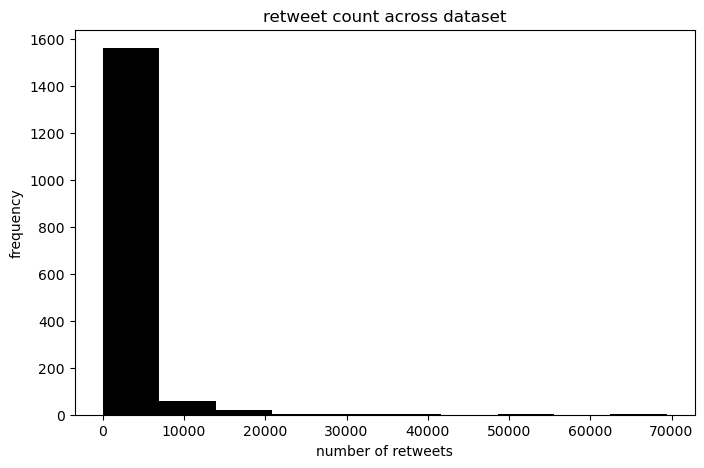

In [77]:
master_df.retweet_count.plot(kind='hist', color='black', figsize=(8,5));
plt.title('retweet count across dataset')
plt.xlabel('number of retweets')
plt.ylabel('frequency');


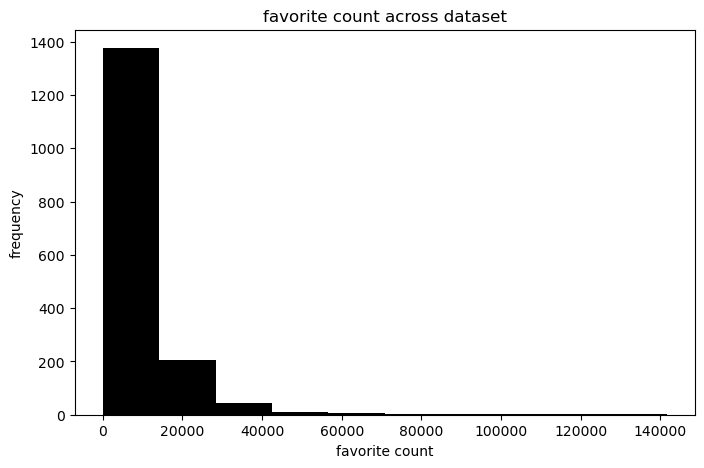

In [78]:
master_df.favorite_count.plot(kind='hist', color='black',figsize=(8,5));
plt.title('favorite count across dataset')
plt.xlabel('favorite count')
plt.ylabel('frequency');


## References
1. Stack overflow. Retrieved from https://stackoverflow.com/ 
2. https://www.kaggle.com/code/rdrubbel/tmdb-finalb 
3. J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007. 
4. McKinney, W., & others. (2010). Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56).